In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import warnings as ws
ws.filterwarnings('ignore')
%matplotlib inline

# Q1: 
# We saw the perceptron algorithm in Lecture 15. I want you to implement this algorithm, and use it to classify banknotes as forged or authentic in this dataset. In particular,

## 1 (a) : Code up the perceptron algorithm described on slide 7 of Lecture 15 using the same notation as in the slides.

In [2]:
np.random.seed(0)
def Perceptron( X, Y, max_iter=200):
    num_of_samples = X.shape[0]
    num_of_features = X.shape[1]
    w = np.ones(num_of_features, dtype=float)
    learning_rate = 1
    # We are assuming that algorithm converges if there is no mistake in classification in k consecutive iterations
    k = 50
    iterations = 0
    for i in range(max_iter):
        n = np.random.randint(low=0, high = num_of_samples-1)
        x_n = X.iloc[n]
        y_n = Y.iloc[n]
        # print("Epoch:",i,"\n")
        # print(x_n)
        
        if (y_n * np.dot(x_n, w.T)) < 0:
            w = w + learning_rate*(y_n*x_n)
#             print(w - learning_rate*(y_n*x_n), ",Epoch:",i)
            iterations = 0
        else:
            iterations+=1
        if (iterations==k):
            break
    return w,i    

## 1 (b) : Write functions to make predictions using the algorithm for the banknotes dataset. Preprocess the dataset to handle missing and anomalous data.

### Read dataset

In [3]:
# #****** For reading on Google Colab ******#
# from google.colab import files
# uploaded = files.upload()
# import io
# df = pd.read_csv(io.BytesIO(uploaded['data_banknote_authentication.txt']),header=None)
# df.columns = ['variance','skewness','curtosis','entropy','class']
# df

In [4]:
df = pd.read_csv('data_banknote_authentication.txt',header=None)
df.columns = ['variance','skewness','curtosis','entropy','class']
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Data preprocessing

In [5]:
## Min Max Scaling
df['variance'] = (df['variance']- df['variance'].min())/(df['variance'].max()- df['variance'].min())
df['skewness'] = (df['skewness']- df['skewness'].min())/(df['skewness'].max()- df['skewness'].min())
df['curtosis'] = (df['curtosis']- df['curtosis'].min())/(df['curtosis'].max()- df['curtosis'].min())
df['entropy'] = (df['entropy']- df['entropy'].min())/(df['entropy'].max()- df['entropy'].min())
df

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1
1368,0.407690,0.332868,0.506753,0.808350,1
1369,0.237385,0.011768,0.985603,0.524755,1
1370,0.250842,0.201701,0.761587,0.660675,1


In [6]:
# Changing class labels to +1/-1
def fun(x):
    if(x==0):
        x = -1
    return x
df['class'] = df['class'].apply(lambda x: fun(x))

# Remove duplicates
df = df.drop_duplicates(keep='first')
df

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,-1
1,0.835659,0.820982,0.121804,0.644326,-1
2,0.786629,0.416648,0.310608,0.786951,-1
3,0.757105,0.871699,0.054921,0.450440,-1
4,0.531578,0.348662,0.424662,0.687362,-1
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1
1368,0.407690,0.332868,0.506753,0.808350,1
1369,0.237385,0.011768,0.985603,0.524755,1
1370,0.250842,0.201701,0.761587,0.660675,1


### Dataset Summary

In [7]:
# Summary of dataset
def summary(data):
    df = {
     'Count' : data.shape[0],
     'NA values' : data.isna().sum(),
     '% NA' : round((data.isna().sum()/data.shape[0]) * 100, 2),
     'Unique' : data.nunique(),
     'Dtype' : data.dtypes,
     'min' : round(data.min(),2),
     '25%' : round(data.quantile(.25),2),
     '50%' : round(data.quantile(.50),2),
     'mean' : round(data.mean(),2),
     '75%' : round(data.quantile(.75),2),   
     'max' : round(data.max(),2)
    } 
    return(pd.DataFrame(df))

print('Shape is :', df.shape)
summary(df)

Shape is : (1348, 5)


,Count,NA values,% NA,Unique,Dtype,min,25%,50%,mean,75%,max
variance,1348,0,0.0,1338,float64,0.0,0.38,0.55,0.54,0.71,1.0
skewness,1348,0,0.0,1256,float64,0.0,0.45,0.60,0.59,0.77,1.0
curtosis,1348,0,0.0,1270,float64,0.0,0.16,0.25,0.29,0.37,1.0
entropy,1348,0,0.0,1156,float64,0.0,0.56,0.72,0.67,0.81,1.0
class,1348,0,0.0,2,int64,-1.0,-1.00,-1.00,-0.09,1.00,1.0


### Split into Train and Test Data

In [8]:
def split(df, test_size=0.2, r = 1):
    X = df.drop('class',axis=1)
    Y = df['class']
    train=df.sample(frac= 1-test_size, random_state= r) #random state is a seed value, if random_state is given, fixed values will be generated
    test=df.drop(train.index)
    x_train = train.drop('class',axis=1)
    y_train = train['class']
    x_test = test.drop('class',axis=1)
    y_test = test['class']
    return x_train, y_train, x_test, y_test

### Prediction Funtion: takes in input X and weight w  --> returns $ w^T x $

In [9]:
def make_prediction(X_test, w):
    y_predicted = np.dot(X_test, w.T)
    y_predicted = y_predicted/abs(y_predicted)
    return y_predicted

### Accuracy Function: To calculate accuracy = 1 - (number of mismatches/total number of samples)

In [10]:
def accuracy(y_test, y_predicted):
    loss = y_test==y_predicted
    num_of_mismatches = loss.value_counts()[0]
    
    accuracy = 1 - (num_of_mismatches/y_test.shape[0])
    error = 1 - accuracy
    return accuracy,error

# Extra Code for self understanding

In [11]:
x_train, y_train, x_test, y_test = split(df, test_size=0.2, r=1)
w,i = Perceptron(x_train, y_train, max_iter=2000) #model trained by perceptron algorithm and resultant weight obtained
# print("predicted weight:", w, "iterations:",i)
y_predicted = make_prediction(x_test, w)
print("Arruracy, loss :",accuracy(y_test, y_predicted))

Arruracy, loss : (0.6851851851851851, 0.3148148148148149)


## 1 (c) :  Train the algorithm on the dataset using cross-validation and report cross-validated test set error


### Cross Validate Function

In [25]:
def crossvalidation(df_train,k=10):
    num_of_features = df.shape[1]
    accuracy_optimal = 0
    w_optimal = np.ones(num_of_features)
    
    # Divide the dataset into k folds to perform cross validation
    folds = np.array_split(df_train.sample(frac=1), k)
    # folds = folds[0] , folds[1], folds[2], folds[3], ... folds[k-1]
    e = 0
    for i in range(k):
        # copy the training dataset. then remove the i-th fold from it.
        train = folds.copy()  # train = folds[0] , folds[1], folds[2], folds[3], ... folds[k-1]
        validate = folds[i]  # validate = folds[0]
        del train[i]  # folds[i] is removed from train ie: train = {train} - {folds[i]}
        train = pd.concat(train, sort=False)  # merge the folds in train  {folds[0], folds[1], folds[2], folds[3], ... folds[k-1]} - {folds[i]}
        x_train = train.drop('class',axis=1)
        y_train = train['class']
        
        x_validate = validate.drop('class',axis=1)
        y_validate = validate['class']
        
        w_temp,iterations = Perceptron(x_train, y_train, max_iter=2000)
        y_pred = make_prediction(x_validate, w)
        
        accuracy_temp, error_temp = accuracy(y_validate, y_pred)
        e += error_temp
        print("Error:",error_temp, ", iteration:",i)
        if(accuracy_temp > accuracy_optimal):
            accuracy_optimal = accuracy_temp
            w_optimal = w_temp
    e = e/k
    print("Average Error :", e)
    return w_optimal, accuracy_optimal, 1-accuracy_optimal

### Report the cross validated test set error

In [26]:
# Split the dataset
df_test = df.sample(frac=0.2, random_state=15)
df_train = df.drop(df_test.index)

# Reporting cross validated test set error
weight_optimal, accuracy_optimal, error_optimal = crossvalidation(df_train, k=10)
# weight_optimal, accuracy_optimal, error_optimal
print("Cross validated test set error: ",error_optimal*100,"%")

Error: 0.3148148148148149 , iteration: 0
Error: 0.3055555555555556 , iteration: 1
Error: 0.4351851851851851 , iteration: 2
Error: 0.287037037037037 , iteration: 3
Error: 0.2777777777777778 , iteration: 4
Error: 0.2777777777777778 , iteration: 5
Error: 0.40740740740740744 , iteration: 6
Error: 0.37962962962962965 , iteration: 7
Error: 0.31775700934579443 , iteration: 8
Error: 0.30841121495327095 , iteration: 9
Average Error : 0.33113534094842506
Cross validated test set error:  27.77777777777778 %


### 1 (d) :  Ensure you use a held out validation set and report F1 score on the held out set for your best model 

In [14]:
## Definition of f1_score function
def f1_score(y_pred , y):
    TP = sum((y == 1 ) & (y_pred == 1) )
    TN = sum((y == -1) & (y_pred == -1))
    FP = sum((y == -1 ) & (y_pred == 1))
    FN = sum((y == 1) & (y_pred == -1) )
    precision = ((TP  * 100)/ float( TP + FP))/100
    recall = ((TP  * 100)/ float( TP + FN))/100
    score = (2*precision*recall)/ (precision + recall)
    return score

### Here we use the held out validation set df_test
### df_test is split into x:features and y:target
# Dataset Split
x = df_test.drop('class', axis=1)
y = df_test['class']

# Making prediction on test dataset
y_pred = make_prediction(x , weight_optimal)

print("The f1_score is:",f1_score(y_pred, y))

The f1_score is: 0.825938566552901


# Q2:

# (a) Write a function to calculate the Bayesian posterior probability given 50 new data samples drawn from a normal distribution with mean 10 and SD 5, assuming a normal prior with mean 25 and s.d. 5. Plot the pdfs of the prior, the likelihood and the posterior distributions. Explain how you derive the likelihood from the data. 

## Deriving likelihood from data
The likelihood for a sample $x$ can be written as:
$$
\begin{align}
P(x|\mu, \sigma^2) = \frac {1} {\sqrt{2 \pi \sigma^2}} e^{\frac{-(x-\mu)^2}{2 \sigma^2}}
\end{align}
$$
We have assumed that our data is independently and identically distributed samples, therefore we can say that likelihood is as following:
$
\begin{align}
P(x_1, x_2, ..., x_n|\mu, \sigma^2) &= \prod_{i=1}^{n} \frac {1} {\sqrt{2 \pi \sigma^2}} e^{\frac{-(x_i-\mu)^2}{2 \sigma^2}} \\
&= \left( \frac {1} {\sqrt{2 \pi \sigma^2}} \right)^n e^{\frac{-\sum_{i=1}^n (x_i-\mu)^2}{2 \sigma^2}} \end{align}
$
<br>
Let's ignore $ \left( \frac {1} {\sqrt{2 \pi \sigma^2}} \right)^n $ for the time being,
We get,<br>$
\begin{align}
P(x_1, x_2, ..., x_n|\mu, \sigma^2) &\propto e^{\frac{-\sum_{i=1}^n (x_i-\mu)^2}{2 \sigma^2}} \\
&\propto e^{\frac {- \left(\sum_{i=1}^n x_i^2 + n \mu^2 - 2 \mu \sum_{i=1}^n x_i \right)} {2 \sigma^2}} \\
&\propto e^{\frac {-n} {2 \sigma^2} \left( \mu^2 - 2\mu \frac{\sum_{i=1}^n x_i}{n} + \frac{\sum_{i=1}^n x_i^2} {n}  \right)} \\
&\propto e^{\frac {-1} {2 \left( \sigma^2 / n \right)} \left( \mu^2 - 2\mu \bar{x} + \frac{\sum_{i=1}^n x_i^2} {n}  \right)} \\
&\propto e^{\frac {-1} {2 \left( \sigma^2 / n \right)} \left( \mu^2 - 2\mu \bar{x} + \frac{\sum_{i=1}^n x_i^2} {n}  \right)}-------------------------(i)
\end{align}
$
We known that the product of normal distributions is also a normal distribution, so the form of the equation we got above will be similar to $ \propto e^{\frac {-1} {2 \sigma^2} (\mu - \mu_L)^2} $, which can be written as $ e^{\frac {-1} {2 \sigma^2} \left( \mu^2 - 2\mu\mu_L + \mu_L^2 \right)} $
On comparing this with equation(i), we can observe that $\mu_L = \bar{x}$ and $\sigma_L^2 = \frac {\sigma^2} {n}$ where $\mu_L$ is the mean and $\sigma_L^2$ is the variance of likelihood distribution.
<br>
Therefore, the probability density function for the likelihood is $\mathcal{N}(\bar {x}, \frac{\sigma^2}{n})$

## Probability for Full Posterior
$\sigma_1^2 = (1/\sigma_0^2 + n/\sigma^2)^{-1}$
<br>

$\mu_1 = \sigma_1^2(\mu_0/\sigma_0^2 + n*x_{mean}/\sigma^2)$
<br><br>

where,<br> 
$\sigma_0$: Standard Deviation of the Prior,
<br>
$\sigma$: Standard Deviation of the Likelihood,
<br>
$\mu_0$: Mean of the Prior,
<br>
$\mu$: Mean of the Likelihood



## Generating Data and Likelihood

In [15]:
def find_pdf(x, mean, variance):
    f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))
    return f

Text(0.5, 1.0, 'Likelihood')

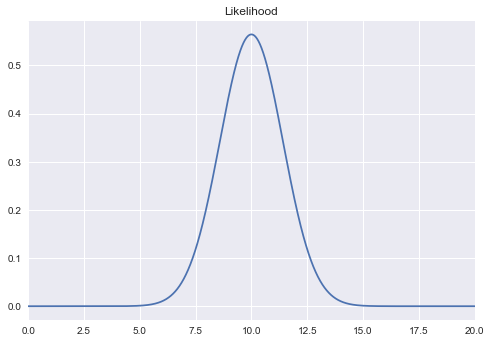

In [16]:
def likelihood(x,mean,sd,n):
    variance_likelihood = np.square(sd)/n
    f_likelihood = find_pdf(x,mean,variance_likelihood)
    return f_likelihood,variance_likelihood

mean_data, sd_data, n = 10, 5, 50
data_likelihood = np.linspace(mean_data - 4*sd_data, mean_data + 4*sd_data, 10000)
plt.style.use('seaborn')
distribution_likelihood, variance_likelihood = likelihood(data_likelihood, mean_data, sd_data,n)
plt.plot(data_likelihood, distribution_likelihood)
plt.xlim([0,20])
plt.title('Likelihood')

## Prior Generation

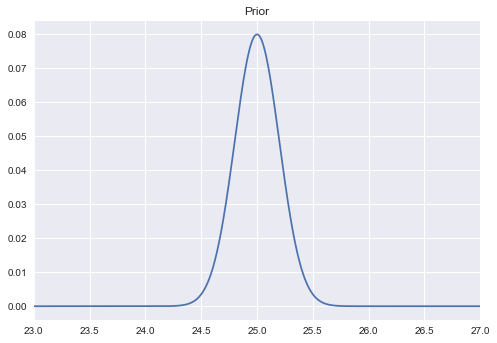

In [17]:
def prior(x,mean,sd):
    f_prior = find_pdf(x,mean,sd**2)
    return f_prior,sd**2
mean_prior, sd_prior, n = 25, 5, 50
data_prior = np.linspace(mean_prior - 4*sd_prior, mean_prior + 4*sd_prior, 10000) 
f_prior,variance_prior = prior(data_prior, mean_prior, sd_prior)
plt.xlim([23,27])
plt.plot(data_prior, f_prior) 
plt.title('Prior')
plt.style.use('seaborn')

## Posterior Generation

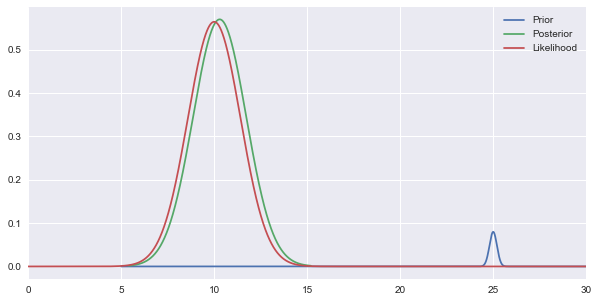

In [18]:
mean_posterior = 0
sd_posterior = 0
data_posterior = 0
distribution_posterior = 0
variance_posterior = 0
def posterior(mean_prior, sd_prior, mean_likelihood, sd_likelihood, n):
    global mean_posterior, sd_posterior, data_posterior, distribution_posterior, variance_posterior
    variance_posterior = 1/(1/variance_prior + 1/variance_likelihood)
    mean_posterior = variance_posterior*(mean_prior/variance_prior + mean_likelihood/variance_likelihood)
    sd_posterior = math.sqrt(variance_posterior) 

    data_posterior = np.linspace (mean_posterior - 10*variance_posterior, mean_posterior + 10*variance_posterior, 10000) 
    distribution_posterior = find_pdf (data_posterior,mean_posterior, variance_posterior)
    
    plt.figure(figsize=(10,5))
    plt.style.use('seaborn')
    plt.plot(data_prior, f_prior) 
    plt.plot(data_posterior, distribution_posterior)
    plt.plot(data_likelihood, distribution_likelihood)
    plt.xlim([0,30])
    plt.legend(['Prior', 'Posterior', 'Likelihood'])
    plt.show()
posterior(mean_prior,sd_prior,mean_data,sd_data, n)

# 2 (b) :  Implement the Metropolis algorithm from the lecture slides to estimate the posterior distribution given the same prior and data and show that it converges to the analytic posterior by plotting a histogram of samples from the distribution alongside the analytic posterior distribution. Assume whatever SD (width) you want for the proposal distribution. 

sigma_accept criteria for $\sigma_{new}$:

$r = \dfrac{Likelihood(D/\mu_{obs},\sigma_{new})*prior(\mu_{obs},\sigma_{new})}{Likelihood(D/\mu_{obs},\sigma_{current})*prior(\mu_{obs},\sigma_{current})}   \quad \quad \quad \quad \quad     \cdots (1)$


If r <= 1, then we compare it to a uniformly generated random number in the closed set [0,1]. If the ratio is larger than the random number, we accept $\sigma_{new}$, otherwise we reject it.

In [19]:
# To compute normal distribution
def norm(x,mu,sigma):
    return (np.exp((-(x-mu)**2)/(2 * sigma**2)))/( np.sqrt(2*np.pi) * sigma )

# To compute expected posterior distribution: using METROPOLIS HASTINGS MCMC APPROXIMATION
def expected_posterior(iters, mu, sigma, proposal_width):

    burn_in = int(iters*0.25)
    curr = random.uniform(mu-5*sigma, mu+5*sigma)
    answer = []

    for i in range(iters):
        answer.append(curr)
        next1 = random.uniform(-proposal_width*sigma+mu,proposal_width*sigma+mu)
        
        curr_prob = norm(curr, mu,sigma)
        move_prob = norm(next1,mu,sigma)
        
        # To compute acceptance probability
        temp_random = random.uniform(0,1)
        r = move_prob/curr_prob
        
        # Update if  r > generated_random_number
        if (r>temp_random):
            curr = next1
    
    # Ignore first burn_in number of samples and return the rest: defining a burn in to ignore 25% of the initial predictions as they are for approximating.
    return answer[burn_in:]

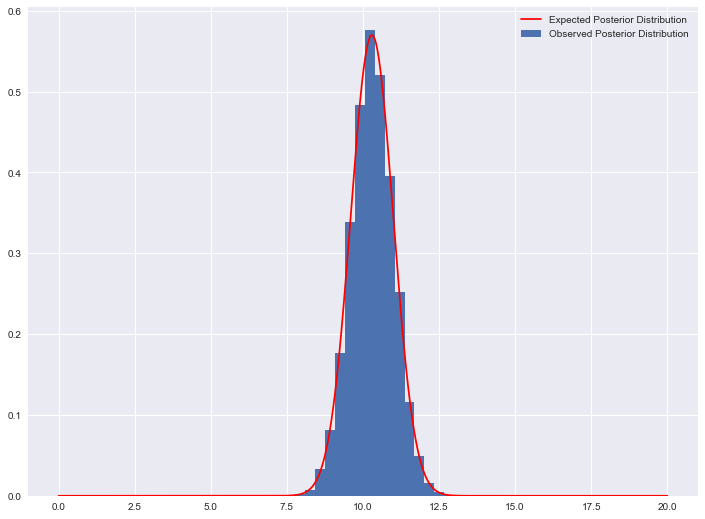

In [20]:
lines = np.linspace(0,20,10000)

dist = expected_posterior(iters = 100000, mu=mean_posterior,sigma=math.sqrt(variance_posterior),proposal_width=5)

posterior = []
for i in lines:
    posterior.append(norm(i, mean_posterior, math.sqrt(variance_posterior)))

plt.figure(figsize=(12, 9))
plt.style.use('seaborn')
plt.hist(dist,bins=20,density=True, label='Observed Posterior Distribution') 
plt.plot(lines,posterior,'r-', label='Expected Posterior Distribution')
# plt.grid()
plt.legend()
plt.show()


# 2 (c) : How does the speed of convergence of the sampling depend on the proposal width? Is there an optimal proposal width that would work best? Demonstrate the consequences of using sub-optimal proposal width and terminating sampling too soon.

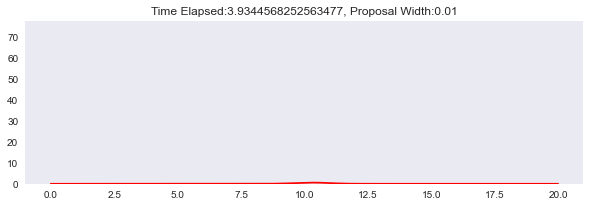

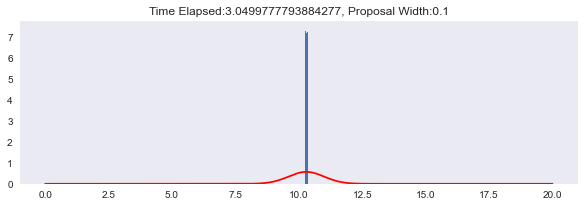

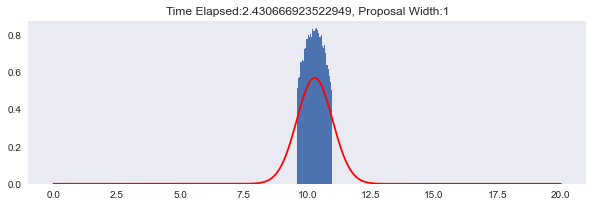

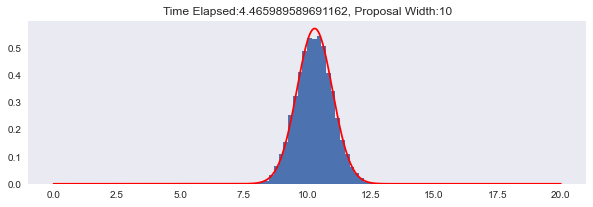

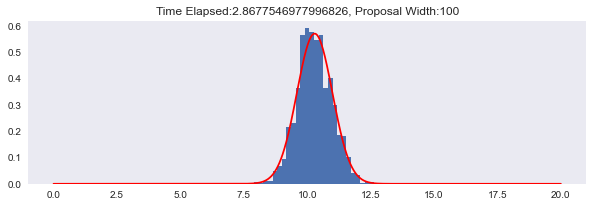

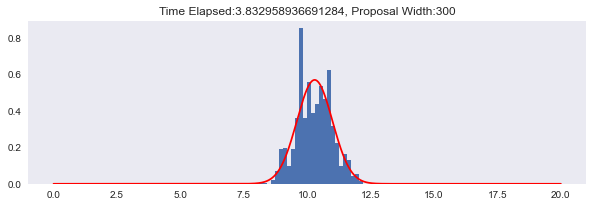

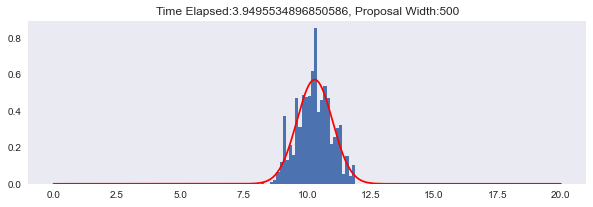

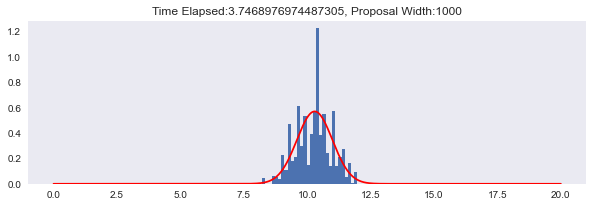

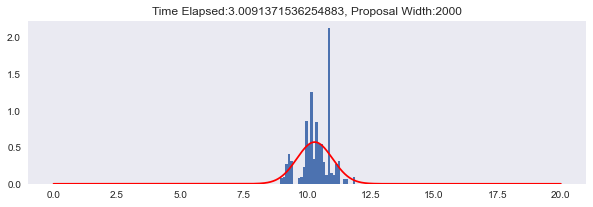

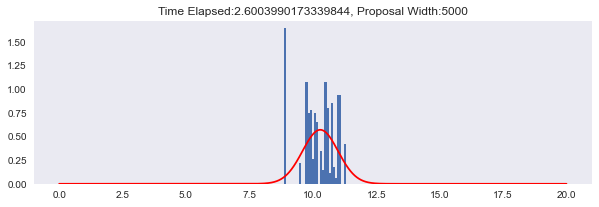

In [21]:
proposal_widths = [0.01, 0.1, 1, 10, 100, 300, 500,1000,2000,5000]
import time
for i in proposal_widths:
    lines = np.linspace(0,20,10000)
    start = time.time()
    dist = expected_posterior(100000,mean_posterior,math.sqrt(variance_posterior),i)
    posterior = [norm(i, mean_posterior, math.sqrt(variance_posterior)) for i in lines]
    end = time.time()

    plt.figure(figsize=(10, 3))
    plt.hist(dist,bins=30,density=True, label='Observed Posterior Distribution') 
    plt.plot(lines,posterior,'r-', label='Expected Posterior Distribution')
    plt.grid()
    t = "Time Elapsed:" + str(end-start) + ', Proposal Width:'+ str(i)
    plt.title(t)
    plt.show()

## Explanation:
## We observe that as we increase the proposal widths, the convergence of the algorithm is affected. Initially, it reaches to more approximate convergence. But after increasing the proposal width beyond a certain limit, the convergence of the algorithm fails. 
## Moreover, time taken to converge increases porportionally with proposal widths upto a certain limit and starts to decrease thereafter. 

In [22]:
print("Execution Completed")

Execution Completed
